# notes
* Now I know I should think in column vector, and Tensorflow is very picky about the shape of data. But in numpy, the normal 1D ndarray is represented as column vector already. If I reshape $\mathbb{R}^n$ as $\mathbb{R}^{n\times1}$, It's not the same as column vector anymore. It's Matrix with 1 column. And I got troubles with scipy optimizer. 
* So I should just treat tensorflow's data as special case. Keep using the convention of numpy world.

In [26]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from helper import logistic_regression as lr  # my own module
from helper import general as general

In [27]:
# prepare data
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [28]:
X = general.get_X(data)
print(X.shape)

y = general.get_y(data)
print(y.shape)

(100, 3)
(100,)


# sigmoid function

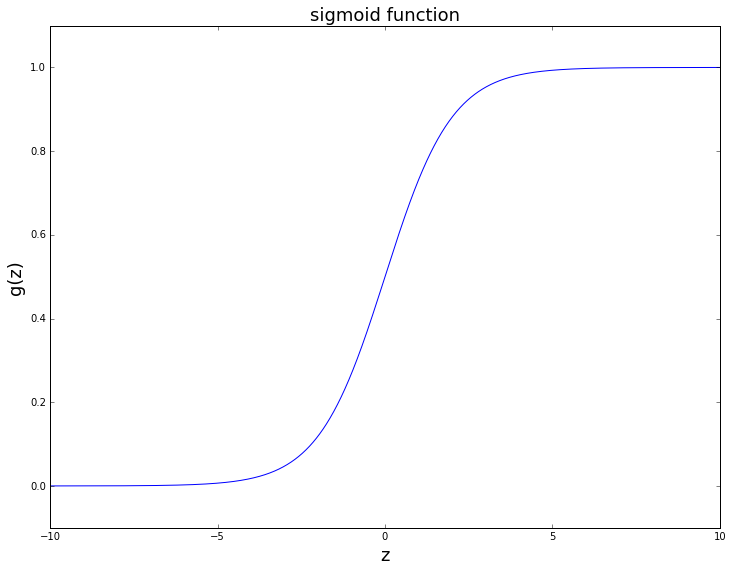

In [29]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(np.arange(-10, 10, step=0.01),
        lr.sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)

# cost function
![](../img/logistic_cost.png)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function


In [30]:
%psource lr.cost

In [31]:
theta = theta=np.zeros(3) # X(m*n) so theta is n*1
theta

array([ 0.,  0.,  0.])

In [32]:
lr.cost(theta, X, y)

0.69314718055994529

looking good, be careful of the data shape

# gradient
![](../img/logistic_gradient.png)
> * this is batch gradient  
> * translate this into vector computation $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$


In [33]:
%psource lr.gradient

In [34]:
lr.gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

# fit the parameter
> here I'm using [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to find the parameters

In [35]:
from scipy.optimize import minimize

In [36]:
res = minimize(fun=lr.cost, x0=theta, args=(X, y), method='Newton-CG', jac=lr.gradient)

In [37]:
print(res)

     fun: 0.20349772124378573
     jac: array([  5.12326719e-07,  -1.76650242e-04,  -1.84793268e-04])
 message: 'Optimization terminated successfully.'
    nfev: 71
    nhev: 0
     nit: 28
    njev: 240
  status: 0
 success: True
       x: array([-25.14983938,   0.20613975,   0.20137862])
